In [1]:
import os
import numpy as np
import scipy.linalg as slin
import scipy.optimize as sopt
from scipy.special import expit as sigmoid
import matplotlib.pyplot as plt

### Running notears
Very simple! Clone the repo, interestingly enough, copy "linear.py" up one directory, and run the command below

In [2]:
# fill this in. This should point to the root of the github repo, i.e., 
# where the directories "bin", "experiments", "notears", etc. are
path = "C:/Users/s165048/OneDrive - TU Eindhoven/QuinceyFinalProject/final-project/src/Week 12/notears/notears"

### Run the main example
For some reason, imports do not work from the original directory, so I had to copy ``linear.py`` and put it also one directory up. Not ideal to have two copies, but I never intend to run it again using ``!python ...`` anyways.

In [3]:
# set working directory to the correct place
os.chdir(path)

# run main of linear.py. Does not allow for changing of settings
!python ../linear.py

VAR based on a graph on 5 nodes and 5 edges, 50 samples.
Original Adjacency Matrix:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]].

Original WAM:
[[ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.5 -1.9]
 [-1.9  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1.1]
 [ 0.   0.  -0.9  0.   0. ]].

Estimated WAM:
[[ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -1.5]
 [-1.9  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1. ]
 [ 0.   0.  -1.   0.   0. ]].

{'fdr': 0.0, 'tpr': 0.8, 'fpr': 0.0, 'shd': 1, 'nnz': 4}


### Step by Step
#### Basic Settings
We import the modules, set the seed for reproducibility. We then define our parameters.

In [4]:
from notears.notears import utils
from notears import linear

utils.set_random_seed(1)

n, d, s0, graph_type, sem_type = 50, 5, 5, 'ER', 'gauss'
print(f"VAR based on a DAG on {d} nodes and {s0} edges, {n} samples.\n")

VAR based on a DAG on 5 nodes and 5 edges, 50 samples.



#### Simulate W
We simulate a directed acyclic graph with $d$ variables and $s0$ edges. The graph type is generally an Erdos Renyi (ER) graph.

In [5]:
B_true = utils.simulate_dag(d, s0, graph_type)
print(f"Original Adjacency Matrix:\n{B_true}.\n")

Original Adjacency Matrix:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]].



#### From AM to WAM
We transform the binary adjacency matrix $B$ to a weighted adjacency matrix $W$. We do this by assigning weights to each edge. The edges are picked uniformly from the range $w\_ranges$.

In [6]:
W_true = utils.simulate_parameter(B_true, w_ranges = ((-2.0, -0.5), (0.5, 2.0)))
print(f"Original WAM:\n{np.round(W_true, 1)}.\n")

Original WAM:
[[ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.5 -1.9]
 [-1.9  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1.1]
 [ 0.   0.  -0.9  0.   0. ]].



#### Simulate VAR data according to $W\_true$
We sample $n$ samples of this VAR(1) model, with a multivariate standard normal as noise. 

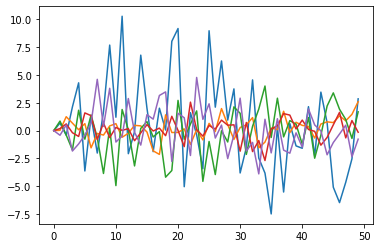

In [7]:
X = utils.simulate_var(W_true, n)
plt.plot(X);

#### NOTEARS Estimation
Now we will estimate using NOTEARS, the $\ell_1$-penalty parameter is $\texttt{lambda1}$. As we have a VAR(1) model, we will use the loss type $\texttt{l2-var}$.

In [8]:
W_est = linear.notears_linear(X, lambda1=0.1, loss_type='l2-var')
print(f"Estimated WAM:\n{np.round(W_est, 1)}.\n")

Estimated WAM:
[[ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -1.5]
 [-1.9  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1. ]
 [ 0.   0.  -1.   0.   0. ]].



#### Get results


In [9]:
acc = utils.count_accuracy(B_true, W_est != 0)
print(acc)

{'fdr': 0.0, 'tpr': 0.8, 'fpr': 0.0, 'shd': 1, 'nnz': 4}
